# Решение задачи Коши

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
c2 = 0.7
A = 3
B = 1.5
C = -1

# оппонент метод - 29

## Вычисление коэффициентов в таблице Бутчера

In [13]:
a21 = c2
b2 = 1 / (2*c2)
b1 = 1 - b2

a21, b2, b1

(0.7, 0.7142857142857143, 0.2857142857142857)

In [14]:
y0 = [1, 1, A, 1]
y0

[1, 1, 3, 1]

## Исходная функция f

$ y' = f(x) $

In [15]:
def f(x: float, y: np.array):
    y1, y2, y3, y4 = y
    
    assert B == 3/2, '1/B = 2/3 for the first value' 
    
    return np.array([
        2*x * np.cbrt(y2)**2 * y4, # 2*x * y2**(1/B) * y4
        2*B*x * np.exp(B/C * (y3 - A)) * y4,
        2*C*x * y4,
        -2*x * np.log(max(1e-1, y1)), # if y1 <= 0
    ])

## Реализация метода Рунге-Кутта (2-этапный)

In [16]:
def runge_kutta2(f, x0: float, y0: np.array, h: float, x_max: float, N_max=1000):
    X, Y = [x0], [y0]
    
    x, y = x0, y0
    iterations = 0
    
    while abs(x - x_max) >= 1e-6 and iterations < N_max:
        x = x + h
        y = y + h*f(x + h/2, y + h/2 * f(x, y))
        
        X.append(x)
        Y.append(y)
        
        iterations += 1
    
    return np.array(X), np.array(Y), iterations

## Реализация метода Рунге-Кутта (3-этапный) - метод оппонент

In [17]:
def runge_kutta3(f, x0: float, y0: np.array, h: float, x_max: float, N_max=1000):
    X, Y = [x0], [y0]
    
    x, y = x0, y0
    iterations = 0
    
    while abs(x - x_max) >= 1e-6 and iterations < N_max:
        k1 = f(x, y)
        k2 = f(x + 1/2*h, y + 1/2*h*k1)
        k3 = f(x + h, y - h*k1 + 2*h*k2)
        
        x = x + h
        y = y + h*(1/6*k1 + 4/6*k2 + 1/6*k3)
        
        X.append(x)
        Y.append(y)
        
        iterations += 1
    
    return np.array(X), np.array(Y), iterations

## Точное решение системы дифф. уравнений

In [18]:
def get_Y_exact(x):
    return np.array([
        np.exp(np.sin(x**2)),
        np.exp(B * np.sin(x**2)),
        C * np.sin(x**2) + A,
        np.cos(x**2),
    ])

## Вычисление решений и сравнение

In [19]:
x0, x_max = 0, 5
y0 = [1, 1, A, 1]
h = 0.1

# exact solution
X_exact = np.linspace(x0, x_max, 200)
Y_exact = get_Y_exact(X_exact).transpose(1, 0)

# Runge-Kutta 2-step
X2, Y2, iterations2 = runge_kutta2(f, x0, y0, h, x_max)
print(f'Метод Рунге-Кутты 2-шаговый: {iterations2} итераций')

# Runge-Kutta 3-step
X3, Y3, iterations3 = runge_kutta3(f, x0, y0, h, x_max)
print(f'Метод Рунге-Кутты 3-шаговый: {iterations3} итераций')

Метод Рунге-Кутты 2-шаговый: 50 итераций
Метод Рунге-Кутты 3-шаговый: 50 итераций


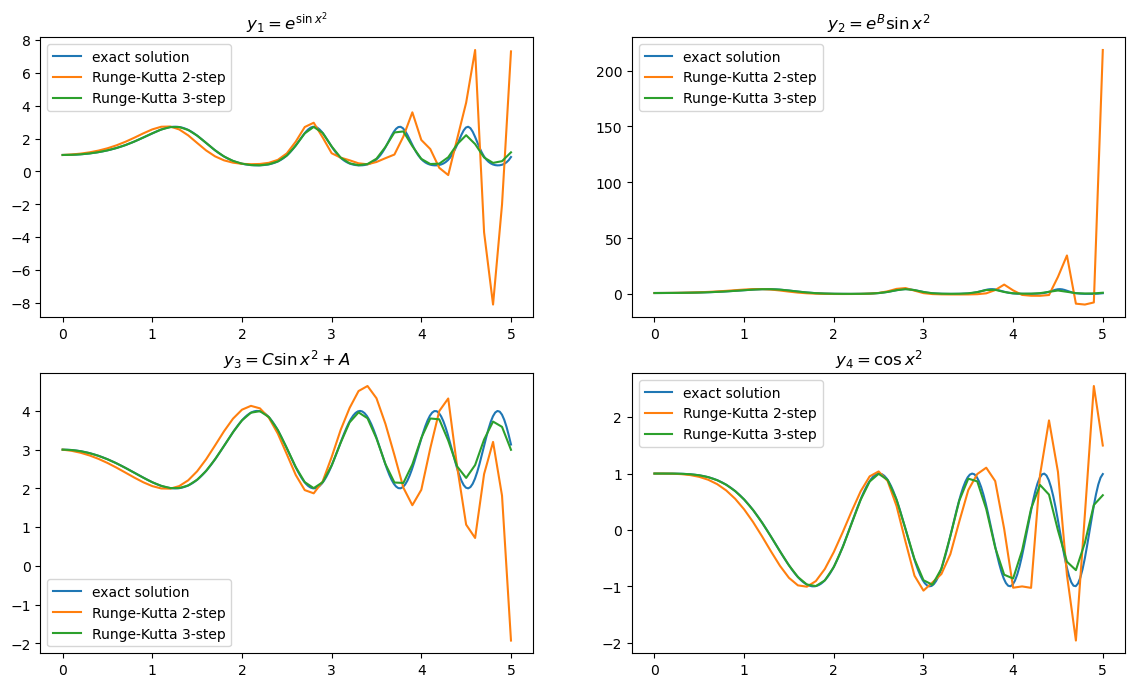

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sol_texts = [
    r'e^{\sin{x^2}}',
    r'e^B{\sin{x^2}}',
    r'C \sin{x^2} + A',
    r'\cos{x^2}',
]

for i, ax in enumerate(axs.flatten()):
    ax.plot(X_exact, Y_exact[:, i], label='exact solution')
    ax.plot(X2, Y2[:, i], label='Runge-Kutta 2-step')
    ax.plot(X3, Y3[:, i], label='Runge-Kutta 3-step')
    ax.set_title(f'$ y_{i+1} = {sol_texts[i]} $')
    ax.legend()